In [4]:
import pandas as pd
import glob 
import seaborn as sns
from joblib import dump, load
from util.DataLoaders import FileDataLoader
from util.Predictors import Model, report_to_df
import yaml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
#load data
data_loader = FileDataLoader('../data/dataset_experimentation.csv')  # Candidate , instantiate your class here
df = data_loader.load_data(impute_nas = True) 
df = df.dropna()

#load target variable and variables to drop
with open("util/config.yaml", "r") as config:
    try:
        config_dict = yaml.safe_load(config)

        drop_features = config_dict['drop_features']
        target_feature = config_dict['target_feature']
    except yaml.YAMLError as exc:
        print(exc)

#split df into train and test sets
X = df.drop(drop_features + target_feature, axis=1)
y = df[target_feature[0]]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.3, random_state=42)

In [7]:
from sklearn.inspection import permutation_importance

#decide which model to load
model_path = '../interview-test-final/util/trained_models\RF_baseline.joblib'
model = load(model_path)

#calculate feature importances using permutation.  
#The permutation importance is defined to be the difference between the baseline metric and metric from 
#permutating the feature column

result = permutation_importance(
    model, X_valid, y_valid, n_repeats=10, random_state=42, n_jobs=2)

feature_names = [feature for feature in X_valid.columns]
forest_importances = pd.Series(result.importances_mean, index=feature_names)

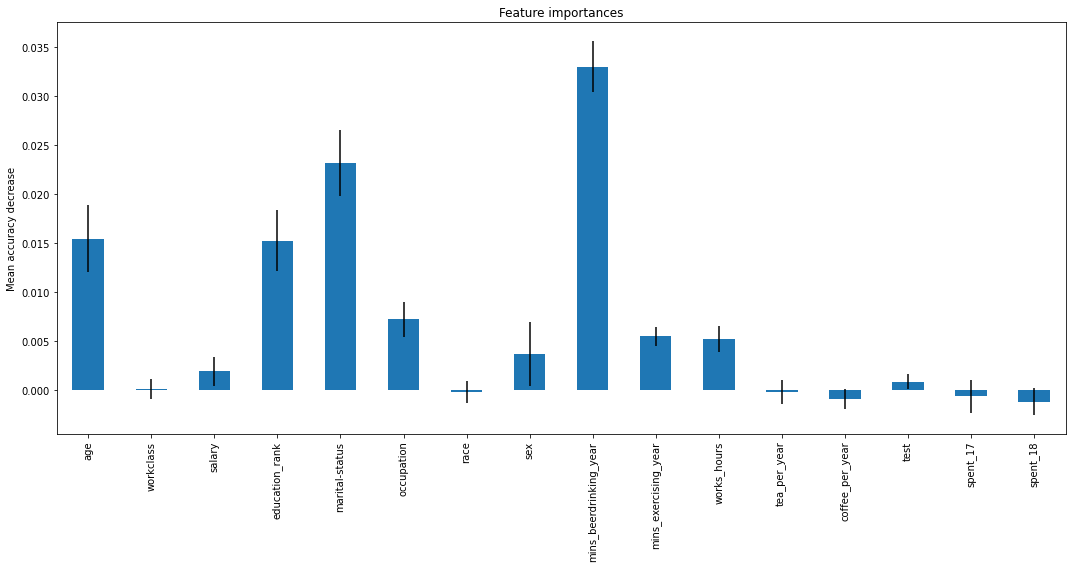

In [8]:
fig, ax = plt.subplots(figsize = (15,8))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()